In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, hstack, vstack
from clevar.catalog import ClCatalog
from astropy.io import ascii

ModuleNotFoundError: No module named 'clevar'

In [5]:
inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/amico_cosmoDC2/mag_i/w_rich/"

In [3]:
c2 = ClCatalog.read(inpath + 'c2_p.fits', 'c2', full = True)
c2 = c2[c2['mt_cross']!= None]
c2.read_members(inpath + 'c2_p_members.fits', full = True)

In [4]:
len(c2), len(c2.members)

(86334, 587182)

In [6]:
c2_mb = Table.read(inpath + 'c2_p_members.fits')

In [7]:
c2_mb

id,id_cluster,ra,dec,z,pmem,mag_g,mag_r,mag_i,mag_z,mag_y,ind_cl
bytes21,bytes21,float64,float64,float64,float64,float32,float32,float32,float32,float32,int64
1250000075,1600020475,50.775875822529436,-27.112584328955446,0.04530489444732666,1.0,14.869303,14.04137,13.667305,13.402172,13.204416,0
1250000078,1600020475,50.77998995907118,-27.107323598441102,0.04530489444732666,1.0,15.914692,15.077406,14.644449,14.309507,14.119247,0
1250000079,1600020475,50.95558315405602,-27.100375281860327,0.04530489444732666,1.0,18.039742,17.265564,16.901432,16.65677,16.48743,0
1250000080,1600020475,50.82368075669441,-27.152891726801627,0.04530489444732666,1.0,17.376867,16.799938,16.517538,16.34986,16.230026,0
1250000081,1600020475,50.90345948560671,-27.10331267498605,0.04530489444732666,1.0,16.36197,15.952614,15.7148075,15.551985,15.428093,0
1250000084,1600020475,50.73752031959006,-27.137772423229062,0.04530489444732666,1.0,16.757736,15.944899,15.564093,15.298132,15.104336,0
1250000086,1600020475,50.70632699671811,-27.150415495632586,0.04530489444732666,1.0,17.942202,17.174496,16.81572,16.574202,16.410166,0
1250000099,2700020475,49.466814189348334,-25.960541211222015,0.04615640640258789,1.0,15.445793,14.616352,14.242224,13.977728,13.779514,1
1250000101,2700020475,49.36152268516141,-25.983754210597972,0.04615640640258789,1.0,16.939217,16.417784,16.146242,15.978891,15.884966,1


In [8]:
cdc_mb = c2_mb

In [12]:
cosmo_values = ascii.read('/sps/lsst/users/tguillem/DESC/desc_may_2021/desc-data-portal/notebooks/dc2/magstar_files/istar.asc')
cosmo_values_c = cosmo_values[cosmo_values['col1']<2]

In [13]:
nbins_z = 25
nbins_mag = 25
z_bins=np.linspace(0,max(cosmo_values['col1']),25)
mag_bins=np.linspace(13,28,25)
n_gal, z, m = np.histogram2d(cdc_mb['z'], cdc_mb['mag_i'], bins=[nbins_z,nbins_mag], range=[[z_bins[0],z_bins[nbins_z-1]],[mag_bins[0],mag_bins[nbins_mag-1]]])
density = n_gal/439.78986

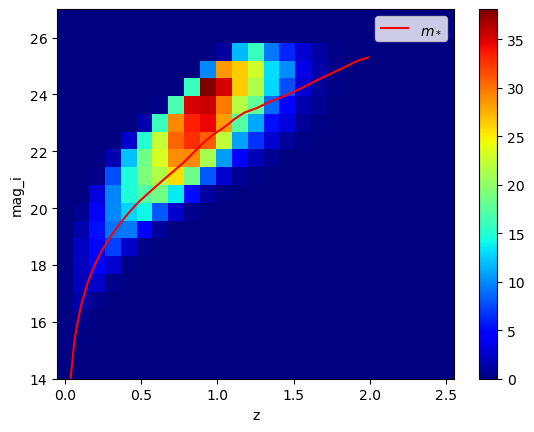

In [14]:
x, y = np.meshgrid(z_bins, mag_bins)
#print(x)
#print(y)
c = plt.pcolormesh(x, y, density.T, cmap='jet', vmin=0)
plt.plot(cosmo_values_c['col1'], cosmo_values_c['col2'], color = 'r', label = '$m_*$')
#ax.set_xlim(0.2,1.2)
#ax.set_ylim(10**13,10**15)
plt.xlabel('z')
plt.ylabel('mag_i')
plt.ylim([14,27])
#ax.set_yscale('log')
plt.colorbar(c)
plt.legend()

In [16]:
c1_mb = Table.read(inpath + 'c1_p_members.fits')

In [8]:
c1_mb

id,id_cluster,ra,dec,z,pmem,lambstar,mag_g,mag_i,mag_r,mag_z,mag_y,ind_cl
bytes21,bytes21,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,int64
9437500204,2,50.642569,-41.402661,0.20000000298023224,0.038664013,62.659902,22.333455145054117,21.34832864969279,21.666022360019937,21.18363672464396,21.084546148472086,0
9437500756,2,50.642569,-41.402661,0.20000000298023224,0.14821322,62.659902,23.667809042423087,22.827698263614494,23.11484006354125,22.69981435248168,22.637915167301017,0
9437501138,2,50.642569,-41.402661,0.20000000298023224,0.091321714,62.659902,24.354483506882712,23.591032884324118,23.84345521708779,23.475350282395407,23.418560884202048,0
9437501655,2,50.642569,-41.402661,0.20000000298023224,0.14304088,62.659902,24.525174579649,23.741416416196852,24.00170274737361,23.622691593198805,23.564017734556227,0
9437501953,2,50.642569,-41.402661,0.20000000298023224,0.010809244,62.659902,23.65694667639132,22.66562702001925,23.00353671850558,22.47910358251925,22.395224111694056,0
9437502456,2,50.642569,-41.402661,0.20000000298023224,0.057772707,62.659902,25.320897042753053,24.55560201406653,24.79640668630774,24.454312264921022,24.40286535024817,0
9437502559,2,50.642569,-41.402661,0.20000000298023224,0.018837579,62.659902,25.30420716424625,24.27335770745914,24.61322053094547,24.073831874329258,23.986366588074375,0
9437502624,2,50.642569,-41.402661,0.20000000298023224,0.26345414,62.659902,25.05263785135511,24.433771884558237,24.633852756140268,24.325888431189096,24.286270892736948,0
9437502737,2,50.642569,-41.402661,0.20000000298023224,0.0759598,62.659902,25.238118735766882,24.22680434367704,24.55512007854032,24.037852851367468,23.95269545695829,0


In [33]:
nbins_z = 25
nbins_mag = 25
z_bins=np.linspace(0,max(cosmo_values['col1']),25)
mag_bins=np.linspace(13,28,25)
n_gal, z, m = np.histogram2d(c1_mb['z'], c1_mb['mag_i'], bins=[nbins_z,nbins_mag], range=[[z_bins[0],z_bins[nbins_z-1]],[mag_bins[0],mag_bins[nbins_mag-1]]], weights = c1_mb['pmem'])
density = n_gal/439.78986

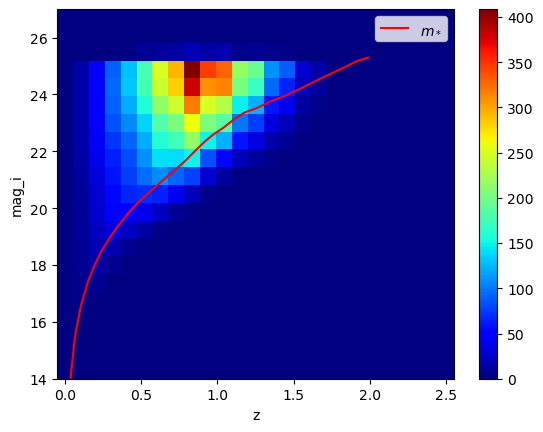

In [34]:
x, y = np.meshgrid(z_bins, mag_bins)
#print(x)
#print(y)
c = plt.pcolormesh(x, y, density.T, cmap='jet', vmin=0)
plt.plot(cosmo_values_c['col1'], cosmo_values_c['col2'], color = 'r', label = '$m_*$')
#ax.set_xlim(0.2,1.2)
#ax.set_ylim(10**13,10**15)
plt.xlabel('z')
plt.ylabel('mag_i')
plt.ylim([14,27])
#ax.set_yscale('log')
plt.colorbar(c)
plt.legend()

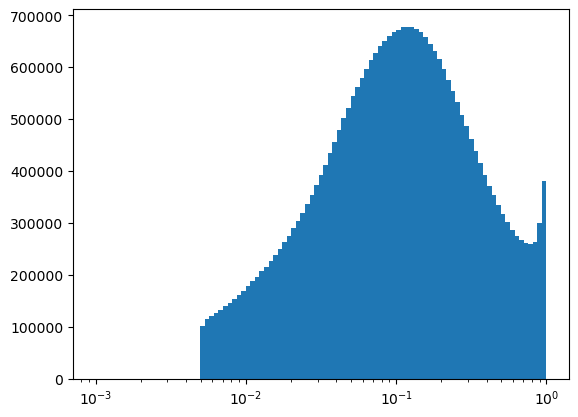

In [23]:
plt.hist(c1_mb['pmem'], bins = np.logspace(-3,0,100))
plt.xscale('log')

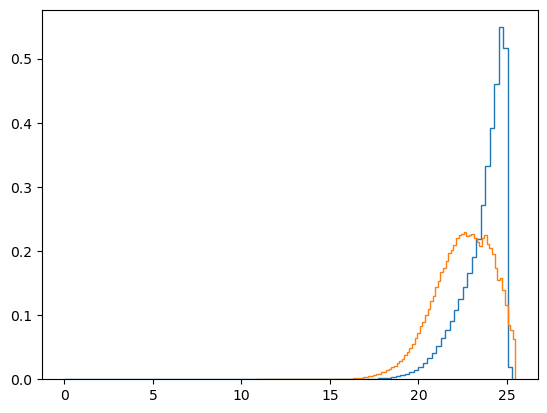

In [32]:
plt.hist(c1_mb['mag_i'], bins = 100, density = True, histtype = 'step')
plt.hist(c2_mb['mag_i'], bins = 100, density = True, histtype = 'step')
plt.show()